In [8]:
from dd_class import Elevage
from dd_class import Dragodinde
import random
import time 

class Model :
    def __init__(self) :
        self.elevage = self.create_elevage()

    def __str__(self) :
        return (f"{self.elevage}")
    
    def get_length_elevage(self) :
        return len(self.elevage.get_dragodindes())
    
    def get_better_generation(self) :
        better_generation = 1
        for dragodinde in self.elevage.get_dragodindes() :
            generation = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
        
        return better_generation

    def get_dd_better_generation(self, dragodindes) :
        better_generation = 1
        index_best_dd = 0
        for idx, dragodinde in enumerate(dragodindes) :
            generation  = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
                index_best_dd = idx
        return dragodindes[index_best_dd]

    def create_elevage(self):

        dragodindes_data = [
            (1, "M", "Rousse", 1),
            (2, "F", "Rousse", 1),
            (3, "M", "Amande", 1),
            (4, "F", "Amande", 1),
            (5, "M", "Dorée", 1),
            (6, "F", "Dorée", 1)
        ]

        list_dd = []
        for id, gender, color, generation in dragodindes_data:
            dragodinde = Dragodinde(id, gender, color, generation)
            list_dd.append(dragodinde)

        return Elevage(list_dd)
    
    def strategy_random_crosing(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        male = random.choice(males)
        female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd
    
    def strategy_crosing_better_gen(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        # Take the best generation
        male = self.get_dd_better_generation(males)
        female = self.get_dd_better_generation(females)

        if male.get_generation() != female.get_generation():
            male = random.choice(males)
            female = random.choice(females)
        
        while male.get_couleur() == female.get_couleur() :
            male = random.choice(males)
            female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd

    def strategy_select_and_purify(self) :
        # select generation
        # Purify (get all the same color for all ancestor) the generation
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]
        
        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")
        
        # bicolor and mono color 
        special_cases = self.elevage.get_special_cases_keys()
        ...

        # purify the actual generation
        # Take the best generation
        male = self.get_dd_better_generation(males)
        female = self.get_dd_better_generation(females)

        # check if male and femelle are pure 
        #if male.get_arbre_genealogique().get_genealogie() :     :
            #crossing each other
          
import matplotlib.pyplot as plt
 
def plot_simlation(list_simulation) : 
    x_values = list(range(len(list_simulation)))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plotting the two lists
    plt.plot(x_values, list_simulation, label='Generation List', color='blue')
    plt.ylim(0, 11)

    # Adding labels and title
    plt.xlabel('Number of Croisement')
    plt.ylabel('Generation Number')
    plt.title('Plot of Generation Numbers per Croisement')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()


In [18]:
elevage = Model()
list_random = [1]
better_generation = 1
crosing_number = 1000
for i in range(crosing_number) :
    new_dd = elevage.strategy_random_crosing()
    generation = new_dd.get_generation()
    if generation > better_generation :
        better_generation = generation
    list_random.append(better_generation)

In [19]:
elevage = Model()
better_generation = 1
list_gen_upgrade_random = [1]
crosing_number = 1000
for i in range(crosing_number) :
    new_dd = elevage.strategy_crosing_better_gen()
    generation = new_dd.get_generation()
    if generation > better_generation :
        better_generation = generation
    list_gen_upgrade_random.append(better_generation)

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]


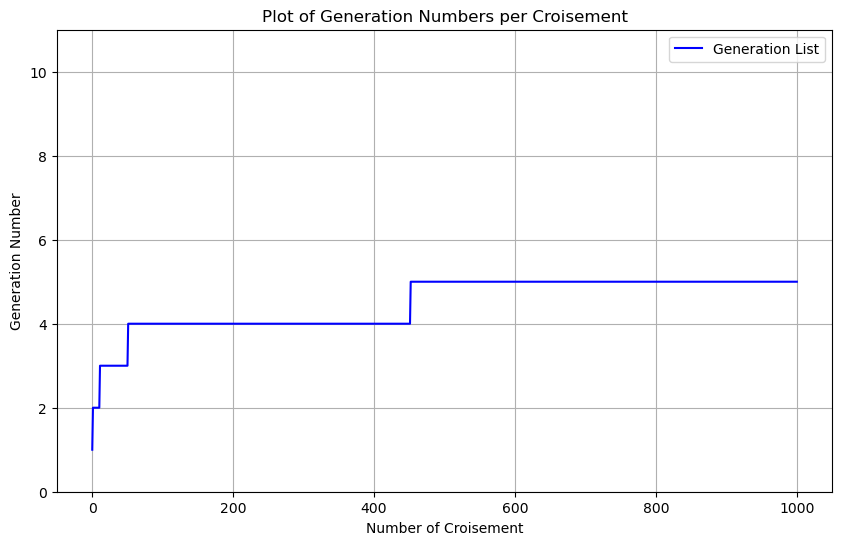

In [21]:
print(list_gen_upgrade_random[:10])
plot_simlation(list_gen_upgrade_random) 

In [23]:
list_simulation_random = []

for i in range(100) :
    elevage = Model()
    list_gen_upgrade_random = [1]
    crosing_number = 1000
    better_generation = 1
    for i in range(crosing_number) :
        new_dd = elevage.strategy_random_crosing()
        generation = new_dd.get_generation()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
    list_simulation_random.append(list_gen_upgrade_random)

In [24]:
list_simulation_better_gen = []

for i in range(100) :
    elevage = Model()
    list_gen_upgrade_random = [1]
    crosing_number = 1000
    better_generation = 1
    for i in range(crosing_number) :
        new_dd = elevage.strategy_crosing_better_gen()
        generation = new_dd.get_generation()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
    list_simulation_better_gen.append(list_gen_upgrade_random)

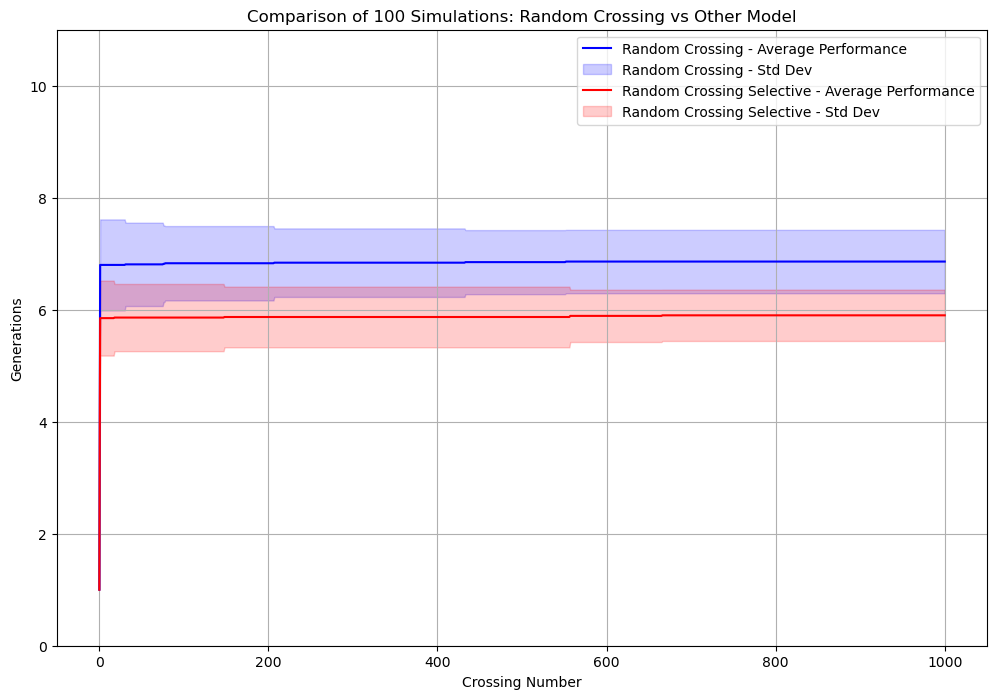

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert both to numpy arrays for easy aggregation
simulation_random_array = np.array(list_simulation_better_gen)
simulation_other_array = np.array(list_simulation_random)

# Calculate mean and standard deviation across simulations for both models
mean_performance_random = np.mean(simulation_random_array, axis=0)
std_performance_random = np.std(simulation_random_array, axis=0)

mean_performance_other = np.mean(simulation_other_array, axis=0)
std_performance_other = np.std(simulation_other_array, axis=0)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot for Random Crossing model
plt.plot(mean_performance_random, label='Random Crossing - Average Performance', color='blue')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_random - std_performance_random, 
                 mean_performance_random + std_performance_random, 
                 color='blue', alpha=0.2, label='Random Crossing - Std Dev')

# Plot for Other model
plt.plot(mean_performance_other, label='Random Crossing Selective - Average Performance', color='red')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_other - std_performance_other, 
                 mean_performance_other + std_performance_other, 
                 color='red', alpha=0.2, label='Random Crossing Selective - Std Dev')

# Customize the plot
plt.title('Comparison of 100 Simulations: Random Crossing vs Other Model')
plt.xlabel('Crossing Number')
plt.ylabel('Generations')
plt.ylim(0, 11)  # Set y-axis limits from 0 to 11
plt.legend()
plt.grid(True)
plt.show()